In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create a tensor
l = [5]*3125
array_5d = np.array(l).reshape((5,5,5,5,5))

tensor_5d = Tensor(array_5d)
print(tensor_5d)

This tensor is of order 5 and consists of 3125 elements.
Sizes and names of its modes are (5, 5, 5, 5, 5) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


In [5]:
# Calculate Frobenious norm
norm = np.linalg.norm(array_5d)
print(norm)

279.5084971874737


### Solution: Part 2

In [6]:
# Create tensors and collect information
tensor_list =[]
n_elements =[]

dim = [2]

order = range(3, 21)

for index_order in order:
    tensor_list.append(np.ones(dim * index_order))
    n_elements.append(np.ones(dim * index_order).size)


print('Example Tensor Shape = ',tensor_list[12].shape)

Example Tensor Shape =  (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)


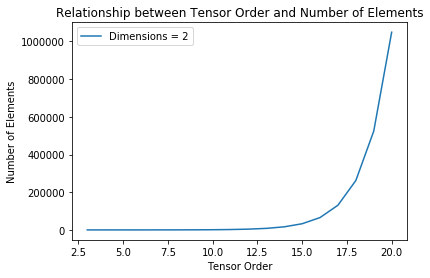

In [7]:
# Plot results
plt.plot(order, n_elements)
plt.legend(['Dimensions = 2'])
plt.title('Relationship between Tensor Order and Number of Elements')
plt.xlabel('Tensor Order')
plt.ylabel('Number of Elements')
plt.show()

### Solution: Part 3

In [8]:
# Create tensors and collect information

tensor_list =[]
n_elements =[]

order = 3

size = range(3, 16)

for index_size in size:
    tensor_list.append(np.ones(order * [index_size]))
    n_elements.append(np.ones(order * [index_size]).size)

    
print('Example Tensor Shape = ',tensor_list[6].shape)

Example Tensor Shape =  (9, 9, 9)


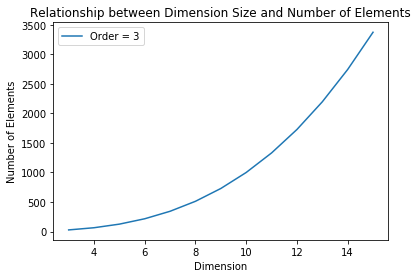

In [9]:
# Plot results

plt.plot(size, n_elements)
plt.legend(['Order = 3'])
plt.title('Relationship between Dimension Size and Number of Elements')
plt.xlabel('Dimension')
plt.ylabel('Number of Elements')
plt.show()

### Solution: Part 4

The relationship between the tensor order and number of elements is clearly exponential in nature whereas the relationship between the tensor dimension and the number of elements is polynomial. Therefore, increasing the order of the tensor has a much more dramatic effect on the memory required to store the tensor compared to increasing the dimension size of the tensor given that exponentials increase much more rapidly than polynomials.


# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [12]:
# Create a tensor of order 4
array = np.random.rand(3,3,3,3)
tensor = Tensor(array)
print(tensor)

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [13]:
# Display slices
for i in range(tensor.shape[0]):
    print('Horizontal slice %d: ' % i)
    print(tensor.data[i, :, :, :],'\n')

Horizontal slice 0: 
[[[0.2323676  0.57847143 0.73047325]
  [0.80038272 0.53977673 0.81194321]
  [0.47693008 0.69134753 0.34870057]]

 [[0.00947516 0.67550349 0.88774883]
  [0.85010254 0.26483237 0.50320103]
  [0.90740021 0.59620583 0.73686015]]

 [[0.99524197 0.87510419 0.55994096]
  [0.66584403 0.51370977 0.15842101]
  [0.5757981  0.01145835 0.56643155]]] 

Horizontal slice 1: 
[[[0.15700843 0.73363839 0.05934281]
  [0.23679617 0.36211092 0.17878348]
  [0.27399698 0.29625239 0.66447686]]

 [[0.191648   0.26187822 0.41823013]
  [0.34527241 0.88521866 0.23132173]
  [0.35211435 0.08902379 0.662796  ]]

 [[0.45781663 0.91359607 0.36859339]
  [0.47155949 0.2410303  0.89086719]
  [0.41976221 0.13143049 0.62947323]]] 

Horizontal slice 2: 
[[[0.68622381 0.31919255 0.82274915]
  [0.06993418 0.57953603 0.97266028]
  [0.77780253 0.41387309 0.23424726]]

 [[0.27503117 0.57177375 0.03527171]
  [0.42471596 0.35137528 0.34319399]
  [0.13990119 0.41987144 0.65385548]]

 [[0.83736394 0.58565316 0.28

In [14]:
# Display fibers
counter = 0
target = 5


for i in range(tensor.shape[0]):
    for j in range(tensor.shape[1]):
        for k in range(tensor.shape[3]):
            if counter == 5:
                break
            counter+=1
            print('Row fiber %d: ' % counter)
            print(tensor.data[:, :, j, k],'\n')

Row fiber 1: 
[[0.2323676  0.00947516 0.99524197]
 [0.15700843 0.191648   0.45781663]
 [0.68622381 0.27503117 0.83736394]] 

Row fiber 2: 
[[0.57847143 0.67550349 0.87510419]
 [0.73363839 0.26187822 0.91359607]
 [0.31919255 0.57177375 0.58565316]] 

Row fiber 3: 
[[0.73047325 0.88774883 0.55994096]
 [0.05934281 0.41823013 0.36859339]
 [0.82274915 0.03527171 0.28508291]] 

Row fiber 4: 
[[0.80038272 0.85010254 0.66584403]
 [0.23679617 0.34527241 0.47155949]
 [0.06993418 0.42471596 0.72904419]] 

Row fiber 5: 
[[0.53977673 0.26483237 0.51370977]
 [0.36211092 0.88521866 0.2410303 ]
 [0.57953603 0.35137528 0.28652191]] 



### Solution: Part 2

In [15]:
# Create a tensor of order 3
tensor = Tensor(np.ones([4, 2, 5]))
for i in range(tensor.shape[2]):
    tensor.data[:, :, i] = np.dot(tensor.data[:, :, i], 2 ** i)
print(tensor)
print(tensor.data)

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create a tensor
tensor = Tensor(np.arange(360).reshape(6, 5, 4, 3))
print(tensor)

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (6, 5, 4, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [18]:
# Display unfolded version
print(tensor.unfold(mode=1).data)

[[  0   1   2   3   4   5   6   7   8   9  10  11  60  61  62  63  64  65
   66  67  68  69  70  71 120 121 122 123 124 125 126 127 128 129 130 131
  180 181 182 183 184 185 186 187 188 189 190 191 240 241 242 243 244 245
  246 247 248 249 250 251 300 301 302 303 304 305 306 307 308 309 310 311]
 [ 12  13  14  15  16  17  18  19  20  21  22  23  72  73  74  75  76  77
   78  79  80  81  82  83 132 133 134 135 136 137 138 139 140 141 142 143
  192 193 194 195 196 197 198 199 200 201 202 203 252 253 254 255 256 257
  258 259 260 261 262 263 312 313 314 315 316 317 318 319 320 321 322 323]
 [ 24  25  26  27  28  29  30  31  32  33  34  35  84  85  86  87  88  89
   90  91  92  93  94  95 144 145 146 147 148 149 150 151 152 153 154 155
  204 205 206 207 208 209 210 211 212 213 214 215 264 265 266 267 268 269
  270 271 272 273 274 275 324 325 326 327 328 329 330 331 332 333 334 335]
 [ 36  37  38  39  40  41  42  43  44  45  46  47  96  97  98  99 100 101
  102 103 104 105 106 107 156 157 1

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original tensor 
tensor = Tensor(np.arange(80).reshape(5, 4, 4))
print(tensor)

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (5, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [21]:
# Create matrix
matrix = Tensor(np.arange(20).reshape(5, 4))
print(matrix)

This tensor is of order 2 and consists of 20 elements.
Sizes and names of its modes are (5, 4) and ['mode-0', 'mode-1'] respectively.


In [22]:
# Perform mode-n product 
tensor_product = tensor.mode_n_product(matrix, mode=1, inplace=False)
print(tensor_product)
print('`Inplace` determines whether to overwrite the original variable or assign the value to a new variable.')

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (5, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
`Inplace` determines whether to overwrite the original variable or assign the value to a new variable.


In [23]:
# Validate equivalence between the left and right hand side
left = tensor_product.unfold(mode=1, inplace=False).data
right = np.matmul(matrix.data, tensor.unfold(mode=1, inplace=False).data)
res = np.array_equal(left, right)
print('Equivalence of left and right =',res)

Equivalence of left and right = True


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create tensor
tensor = Tensor(np.arange(6).reshape(1, 2, 3))
print(tensor)

This tensor is of order 3 and consists of 6 elements.
Sizes and names of its modes are (1, 2, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [25]:
# Create matrices
matrix_a = Tensor(np.arange(2).reshape(2, 1))
matrix_b = Tensor(np.arange(6).reshape(3, 2))
print(matrix_a, '\n')
print(matrix_b)

This tensor is of order 2 and consists of 2 elements.
Sizes and names of its modes are (2, 1) and ['mode-0', 'mode-1'] respectively. 

This tensor is of order 2 and consists of 6 elements.
Sizes and names of its modes are (3, 2) and ['mode-0', 'mode-1'] respectively.


In [26]:
# Validate property 1
p_1_left = tensor.mode_n_product(matrix_a, mode=0, inplace=False).mode_n_product(matrix_b, mode=1, inplace=False)
p_1_right = tensor.mode_n_product(matrix_b, mode=1, inplace=False).mode_n_product(matrix_a, mode=0, inplace=False)
res_1 = np.array_equal(p_1_left, p_1_right)
print('Property 1 =', res_1)

Property 1 = True


In [27]:
# Validate property 2
p_2_left = tensor.mode_n_product(matrix_a, mode=0, inplace=False).mode_n_product(matrix_b, mode=0, inplace=False)
p_2_right = tensor.mode_n_product(np.matmul(matrix_b.data, matrix_a.data), mode=0, inplace=False)
res_2 = np.array_equal(p_2_left, p_2_right)
print('Property 2 =', res_2)

Property 2 = True


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [28]:
%%latex
Begin with the mode-$n$ product equation from Assignment 3:
$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y} = \mathbf{A} \mathbf{X}  $$
Multiply both sides by $\mathbf{B}$:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{Y}}  \times_n \mathbf{B}  $$
Now, substitute $\mathbf{\underline{Y}}$ out:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{A} \mathbf{X}  \times_n \mathbf{B}  $$
And rearranging gives the final result:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$


<IPython.core.display.Latex object>